# Enhanced Feature Engineering

In this notebook, we expand on the initially cleaned and scaled dataset to capture deeper behavioral and temporal patterns that may influence monetization.

**Feature Categories Introduced**

1. Interaction Features:
   * Combine existing numerical metrics such as (DAU x session duration), to capture compound behavioral effects.
  
2. Behavioral Buckets:
   * Flag patternsuch as high engagement - low monetization or game with many viewers but short session times.
  
3. Temporal Features:
   * Extract insights based on release timing, including month, quarter and day of the week.

4. Binned Categories:
   * Convert continuous variables like DAU and revenue into labaled quartiles for more interpretable segmentation.


In [3]:
import pandas as pd

In [5]:
# Load the feature-engineered dataset
df = pd.read_csv("data/scaled_data_20250520_230548.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   date                             4989 non-null   object 
 1   platform                         4989 non-null   object 
 2   daily_active_users_dau           4989 non-null   int64  
 3   new_registrations                4989 non-null   int64  
 4   session_duration_minutes         4989 non-null   float64
 5   ingame_purchases_                4989 non-null   float64
 6   social_media_mentions            4989 non-null   int64  
 7   stream_viewership                4989 non-null   float64
 8   revenue_                         4989 non-null   float64
 9   top_genre                        4989 non-null   object 
 10  influencer_endorsements          4989 non-null   int64  
 11  revenue_per_user                 4989 non-null   float64
 12  log_revenue_per_user

In [12]:
#----Step 1: Create Interaction Features----
df['dau_x_duration'] = df['daily_active_users_dau'].astype(float) * df['session_duration_minutes'].astype(float)
df['stream_viewers_per_player'] = df['stream_viewership'].astype(float) / df['daily_active_users_dau'].astype(float)
df['purchases_per_session'] = df['ingame_purchases_'].astype(float) / df['session_duration_minutes'].astype(float)

# Replace infinity values and drop rows with NA in new columns
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df.dropna(subset=['stream_viewers_per_player', 'purchases_per_session'], inplace=True)

df.head()

,date,platform,daily_active_users_dau,new_registrations,session_duration_minutes,ingame_purchases_,social_media_mentions,stream_viewership,revenue_,top_genre,...,scaled_session_duration_minutes,scaled_ingame_purchases_,scaled_revenue_per_user,scaled_log_revenue,scaled_social_media_mentions,scaled_stream_viewership,scaled_new_registrations,dau_x_duration,stream_viewers_per_player,purchases_per_session
0,2022-04-13,PC,142204,14220,31.266635,60772.724060,7116,85079.542766,87378.407590,Action,...,0.250982,0.564379,0.042113,0.841026,0.679595,0.707666,0.696156,4.446241e+06,0.598292,1943.692493
1,2021-03-17,PC,132314,13231,23.314436,43499.834450,6582,64188.420576,41132.113751,Action,...,0.164320,0.372340,0.020346,0.619354,0.620249,0.480456,0.644076,3.084826e+06,0.485122,1865.789709
2,2019-03-09,VR,111557,11155,33.859334,52178.791314,5572,34385.665788,71787.342041,Simulation,...,0.279237,0.468832,0.044195,0.783202,0.508002,0.156324,0.534755,3.777246e+06,0.308234,1541.045989
3,2021-03-31,Console,132909,13290,80.580010,25085.562444,6619,43129.915707,18639.641156,RPG,...,0.788394,0.167611,0.008113,0.386495,0.624361,0.251426,0.647183,1.070981e+07,0.324507,311.312475
4,2021-02-04,Mobile,130694,13069,37.270903,55277.074439,6555,69341.389827,63849.959750,Action,...,0.316416,0.503278,0.033085,0.748730,0.617248,0.536499,0.635545,4.871083e+06,0.530563,1483.116044


In [14]:
# ------Step 2: Create Behavioral Buckets-------
df['behavior_high_engagement_low_monetization'] = (
    (df['session_duration_minutes'].astype(float) > 60) &
    (df['revenue_per_user'].astype(float) < df['revenue_per_user'].astype(float).median())
).astype(int)

df['behavior_high_purchases_low_dau'] = (
    (df['ingame_purchases_'].astype(float) > df['ingame_purchases_'].astype(float).quantile(0.75)) &
    (df['daily_active_users_dau'].astype(float) < df['daily_active_users_dau'].astype(float).median())
).astype(int)

df['behavior_stream_viewers_high_low_game_session'] = (
    (df['stream_viewership'].astype(float) > df['stream_viewership'].astype(float).median()) &
    (df['session_duration_minutes'].astype(float) < df['session_duration_minutes'].astype(float).median())
).astype(int)

df.head()

,date,platform,daily_active_users_dau,new_registrations,session_duration_minutes,ingame_purchases_,social_media_mentions,stream_viewership,revenue_,top_genre,...,scaled_log_revenue,scaled_social_media_mentions,scaled_stream_viewership,scaled_new_registrations,dau_x_duration,stream_viewers_per_player,purchases_per_session,behavior_high_engagement_low_monetization,behavior_high_purchases_low_dau,behavior_stream_viewers_high_low_game_session
0,2022-04-13,PC,142204,14220,31.266635,60772.724060,7116,85079.542766,87378.407590,Action,...,0.841026,0.679595,0.707666,0.696156,4.446241e+06,0.598292,1943.692493,0,0,1
1,2021-03-17,PC,132314,13231,23.314436,43499.834450,6582,64188.420576,41132.113751,Action,...,0.619354,0.620249,0.480456,0.644076,3.084826e+06,0.485122,1865.789709,0,0,1
2,2019-03-09,VR,111557,11155,33.859334,52178.791314,5572,34385.665788,71787.342041,Simulation,...,0.783202,0.508002,0.156324,0.534755,3.777246e+06,0.308234,1541.045989,0,0,0
3,2021-03-31,Console,132909,13290,80.580010,25085.562444,6619,43129.915707,18639.641156,RPG,...,0.386495,0.624361,0.251426,0.647183,1.070981e+07,0.324507,311.312475,1,0,0
4,2021-02-04,Mobile,130694,13069,37.270903,55277.074439,6555,69341.389827,63849.959750,Action,...,0.748730,0.617248,0.536499,0.635545,4.871083e+06,0.530563,1483.116044,0,0,1


* **Stream Viewership:** How many people are watching the game live (Twitch, YouTube Gaming, etc.)
* **DAU:** How many people are actively playing the game

So `stream_viewers_per_player` tells us:
* How many viewers there are per player.
* If this number is high, the game may be:
    * Popular for streaming (spectator appeal)
    * More watched than played
    * Influenced by streamers

It matters because:
* High stream viewership per player might correlate with viral or influencer-driven games
* Great for marketers or publishers who want to capitalize on visibility
* During peak trends, there are lots of viewers per actual player.

In [16]:
#--------Step 3: Release Time Categories--------

#1. Convert date column to date time format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

#2. Extract useful date components
df['release_month'] = df['date'].dt.month
df['release_dayofweek'] = df['date'].dt.dayofweek
df['release_quarter'] = df['date'].dt.quarter

#3. Add binary flags for key seasonal periods
df['holiday_season'] = df['release_month'].isin([11,12]).astype(int)
df['summer_season'] = df['release_month'].isin([6,7,8]).astype(int)

#4. Drop raw date column
df.drop('date', axis=1, inplace=True)

df.head()

,platform,daily_active_users_dau,new_registrations,session_duration_minutes,ingame_purchases_,social_media_mentions,stream_viewership,revenue_,top_genre,influencer_endorsements,...,stream_viewers_per_player,purchases_per_session,behavior_high_engagement_low_monetization,behavior_high_purchases_low_dau,behavior_stream_viewers_high_low_game_session,release_month,release_dayofweek,release_quarter,holiday_season,summer_season
0,PC,142204,14220,31.266635,60772.724060,7116,85079.542766,87378.407590,Action,0,...,0.598292,1943.692493,0,0,1,4,2,2,0,0
1,PC,132314,13231,23.314436,43499.834450,6582,64188.420576,41132.113751,Action,0,...,0.485122,1865.789709,0,0,1,3,2,1,0,0
2,VR,111557,11155,33.859334,52178.791314,5572,34385.665788,71787.342041,Simulation,0,...,0.308234,1541.045989,0,0,0,3,5,1,0,0
3,Console,132909,13290,80.580010,25085.562444,6619,43129.915707,18639.641156,RPG,0,...,0.324507,311.312475,1,0,0,3,2,1,0,0
4,Mobile,130694,13069,37.270903,55277.074439,6555,69341.389827,63849.959750,Action,0,...,0.530563,1483.116044,0,0,1,2,3,1,0,0


In [18]:
# ------Step 4: Binned Categories----------
df['dau_bin'] = pd.qcut(df['daily_active_users_dau'].astype(float), q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['revenue_bin'] = pd.qcut(df['revenue_'].astype(float), q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# save enhanced feature dataset
enhanced_data_path = "data/enhanced_gaming_trends_data.csv"
df.to_csv(enhanced_data_path, index=False)

enhanced_data_path

df.head()

,platform,daily_active_users_dau,new_registrations,session_duration_minutes,ingame_purchases_,social_media_mentions,stream_viewership,revenue_,top_genre,influencer_endorsements,...,behavior_high_engagement_low_monetization,behavior_high_purchases_low_dau,behavior_stream_viewers_high_low_game_session,release_month,release_dayofweek,release_quarter,holiday_season,summer_season,dau_bin,revenue_bin
0,PC,142204,14220,31.266635,60772.724060,7116,85079.542766,87378.407590,Action,0,...,0,0,1,4,2,2,0,0,High,High
1,PC,132314,13231,23.314436,43499.834450,6582,64188.420576,41132.113751,Action,0,...,0,0,1,3,2,1,0,0,High,Medium
2,VR,111557,11155,33.859334,52178.791314,5572,34385.665788,71787.342041,Simulation,0,...,0,0,0,3,5,1,0,0,Medium,High
3,Console,132909,13290,80.580010,25085.562444,6619,43129.915707,18639.641156,RPG,0,...,1,0,0,3,2,1,0,0,High,Low
4,Mobile,130694,13069,37.270903,55277.074439,6555,69341.389827,63849.959750,Action,0,...,0,0,1,2,3,1,0,0,High,Medium


Binned Categories simplifies complex numeric data
* Instead of working with raw DAU values like 34,832, now there are tiers such as:
    * "Medium" DAU
    * "Very High" revenue

This makes it easier to:
* Compare patterns across tiers
* Create rules or segments
* Communicate findings to non-technical stakeholders


#### How this helps stakeholder recommendations:

* PMs :	See which tiers underperform for roadmap focus.
* Marketers : Target games in “Low DAU / High Revenue” for growth
* Designers : Prioritize UI/UX testing in “High DAU / Low Revenue” category

#### Genre Aggregation for EDA & Recommendations

Use genre-level summaries to:
* Identify which genres are overperforming or underperforming
* Create strategic insights for stakeholder mapping
* Enrich cluster labeling later
* This gives human-readable insights before converting genre into machine-friendly features.


Aggregate by genre using:
* Avg revenue per user
* Avg session duration
* DAU
* Platform
* In-game purchases

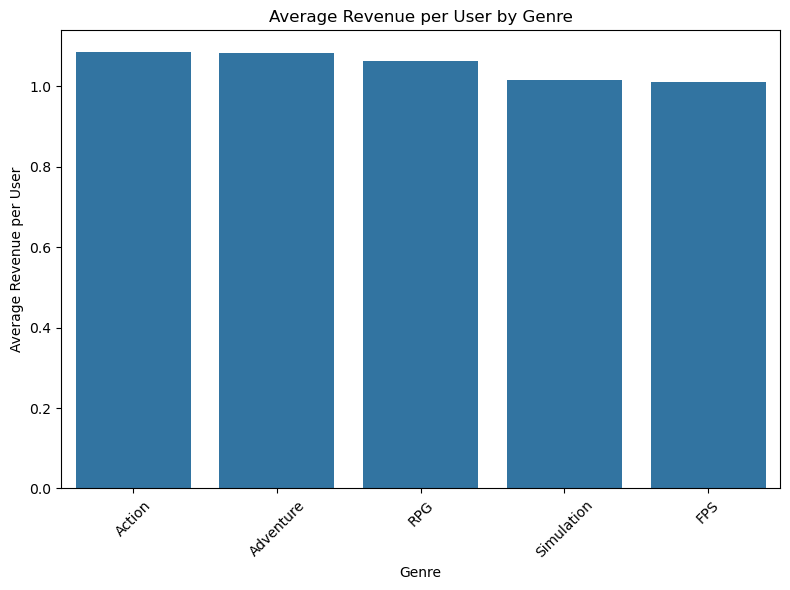

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Genre-level aggregation
genre_summary = df.groupby('top_genre')[[
    'revenue_per_user', 'session_duration_minutes', 'daily_active_users_dau',
    'stream_viewership', 'ingame_purchases_'
]].mean().sort_values(by='revenue_per_user', ascending=False).reset_index()

# Visualize avg. revenue per user by genre
plt.figure(figsize=(8, 6))
sns.barplot(x='top_genre', y='revenue_per_user', data=genre_summary)
plt.xlabel('Genre')
plt.ylabel('Average Revenue per User')
plt.title('Average Revenue per User by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Revenue Per User by Genre: 

* Most genres are monetizing similarly, but there may still be statistically significant differences on deeper analysis.



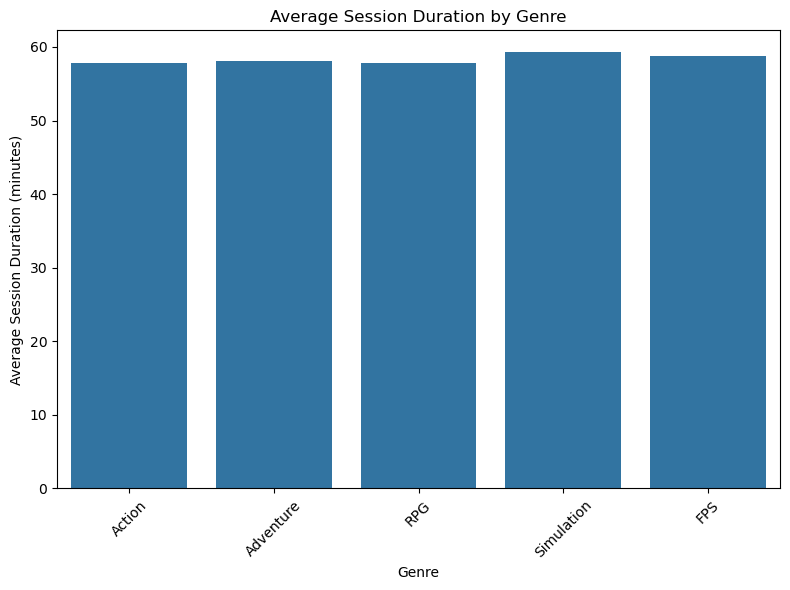

In [28]:
# Visualize average session duration by genre
plt.figure(figsize=(8, 6))
sns.barplot(x='top_genre', y='session_duration_minutes', data=genre_summary)
plt.xlabel('Genre')
plt.ylabel('Average Session Duration (minutes)')
plt.title('Average Session Duration by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Session Duration by Genre: 

* Also appears similar, but some genres show slightly higher average playtime, which might interact with other variables (like purchases or viewership) in non-obvious ways.

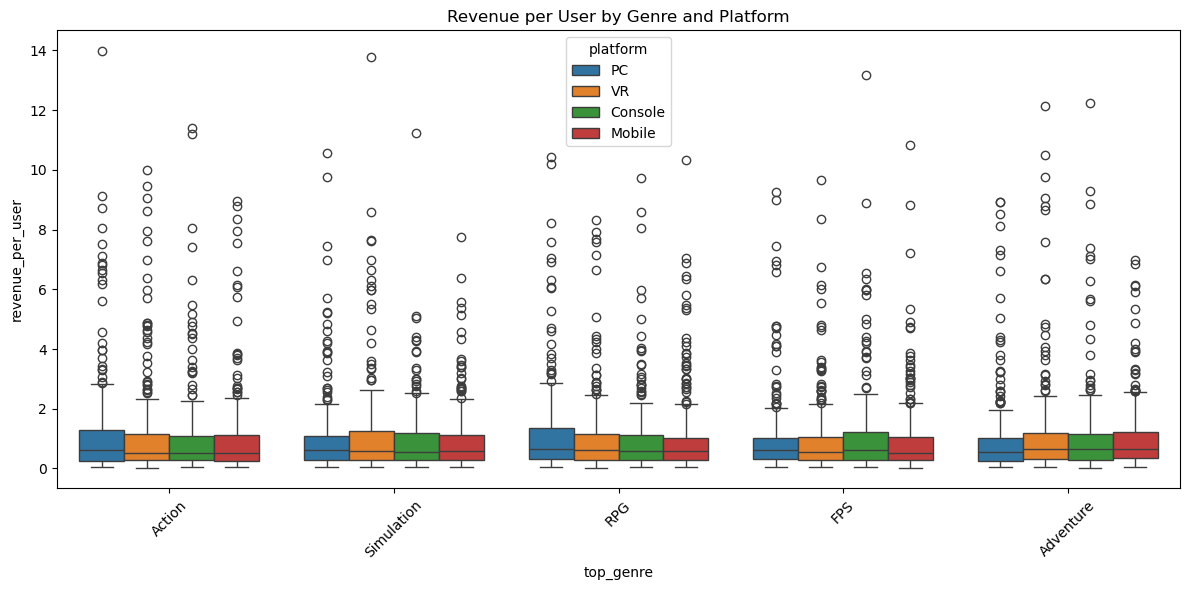

In [61]:
# Visualize revenue per user by genre and platform
plt.figure(figsize=(12,6))
sns.boxplot(x='top_genre', y='revenue_per_user', hue='platform', data=df)
plt.title('Revenue per User by Genre and Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Interpretation:

1. **PC and Console lead RPU across genres:**

* For most genres (Action, RPG, FPS), PC shows a consistently higher median and upper quartile RPU, followed closely by Console.

* This aligns with expectations:
    * PC and Console gamers tend to spend more on full games and in-game features.

2. **Mobile and VR show lower central values:**

* Despite having broad distribution (lots of outliers), their median RPU is consistently lower.

* Indicates mobile games are either free-to-play or monetize through microtransactions that don’t translate into high RPU per user.

3. **Genre Spread is Consistent:**

* While Adventure and FPS have slightly wider spreads, the general shape of the box plots across genres is similar.

* Suggests that `platform` has more influence on monetization than `genre` alone.

This Is a Valuable Plot, because:

* Product Managers : Can prioritize PC/Console for genres where users show higher RPU (e.g, Action, RPG).
* Marketers : May target high-value users more effectively by platform rather than genre alone.
* Developers : Can optimize performance/features for platforms that drive higher spending.
* Designers : Might explore session experience or interface differences between platforms with lower RPU.

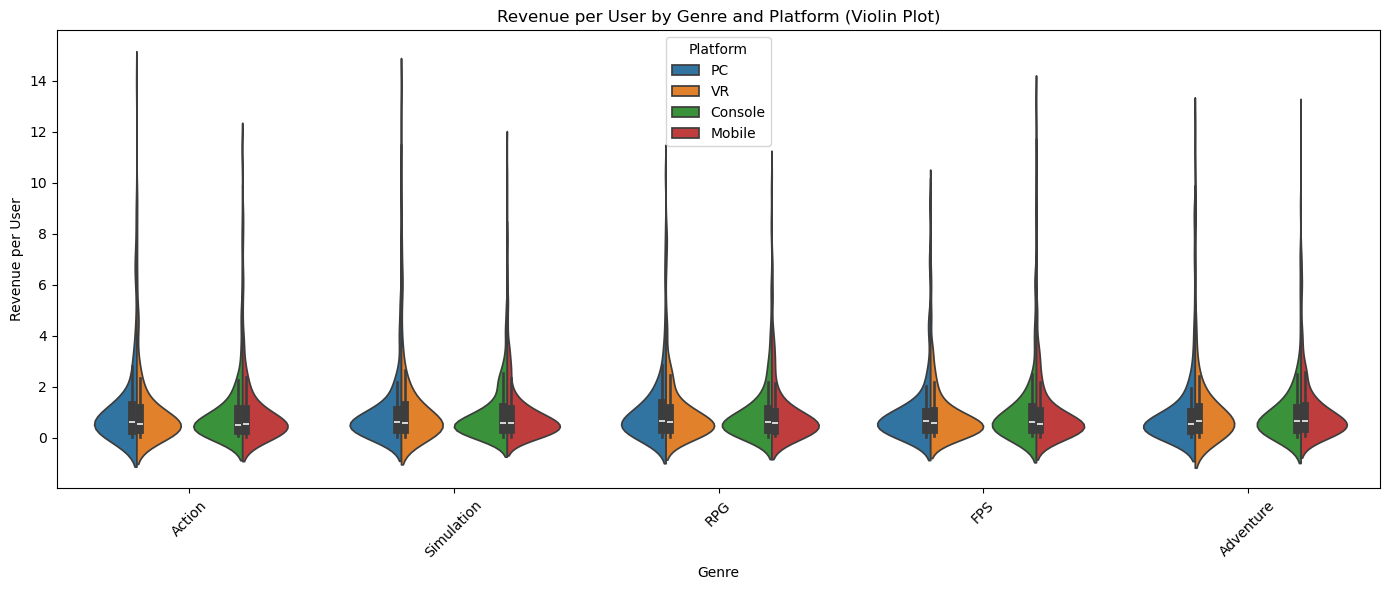

In [63]:
# Create a violin plot for Revenue per User by Genre and Platform
plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='top_genre', y='revenue_per_user', hue='platform', split=True)
plt.title('Revenue per User by Genre and Platform (Violin Plot)')
plt.xlabel('Genre')
plt.ylabel('Revenue per User')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

#### Interpretation

This plot visualizes the distribution of Revenue per User (RPU) across different Genres split by Platform. The spread and density of each "violin" highlight:

* The median and IQR (interquartile range) of RPU per genre-platform combo.

* PC and Console tend to have a wider range and more variance in monetization than Mobile or VR.

* Action and Simulation games on Console or PC appear to reach higher monetization outliers.

In [38]:
# Grouped summary statistics
grouped_stats = df.groupby(['platform', 'top_genre'])['revenue_per_user'].agg(['mean', 'median', 'count']).reset_index()
grouped_stats = grouped_stats.sort_values(by='mean', ascending=False)

grouped_stats.reset_index(drop=True, inplace=True)

# Display the results
print(grouped_stats)

   platform   top_genre      mean    median  count
0        PC      Action  1.210714  0.625627    253
1        VR   Adventure  1.186495  0.640720    230
2        PC         RPG  1.180000  0.647603    248
3        VR  Simulation  1.140686  0.580119    251
4        VR      Action  1.126368  0.517039    275
5   Console         FPS  1.096466  0.619698    244
6   Console   Adventure  1.083221  0.643987    246
7    Mobile   Adventure  1.072136  0.650645    221
8        VR         RPG  1.041121  0.614194    254
9        PC  Simulation  1.031476  0.612350    244
10   Mobile         RPG  1.024180  0.580757    265
11   Mobile      Action  1.022151  0.523431    259
12  Console         RPG  1.008814  0.595490    237
13       PC         FPS  1.006353  0.632483    244
14       PC   Adventure  0.999033  0.535297    261
15  Console      Action  0.990815  0.508525    285
16   Mobile         FPS  0.982913  0.533044    237
17       VR         FPS  0.963461  0.553715    260
18  Console  Simulation  0.9596

#### Stats Interpretation by Stakeholder

* Developers
    * PC-Action and PC-RPG games are monetizing exceptionally well -> prioritize feature development and updates for these segments.

    * VR-Adventure is highly lucrative -> explore VR-specific performance optimization and onboarding UX.

* Product Managers
    * Use this table to align roadmap priorities with high-RPU genre-platform combos.

    * Consider deeper monetization integration for VR genres (e.g, Simulation, Adventure) given their strong averages.

* Designers
    * Prioritize immersive UI/UX in top-performing combos (e.g, PC-RPG, VR-Adventure).

    * Optimize in-game purchase and session progression flow where median RPU is high but count is modest (e.g, Mobile-Adventure).

* Marketers
    * Target platform-genre pairs with high RPU and user counts for ad spend and influencer campaigns:
        * PC-Action (RPU 1.21, 253 entries)
        * VR-Action and Simulation (RPU > 1.1, 275+ entries)

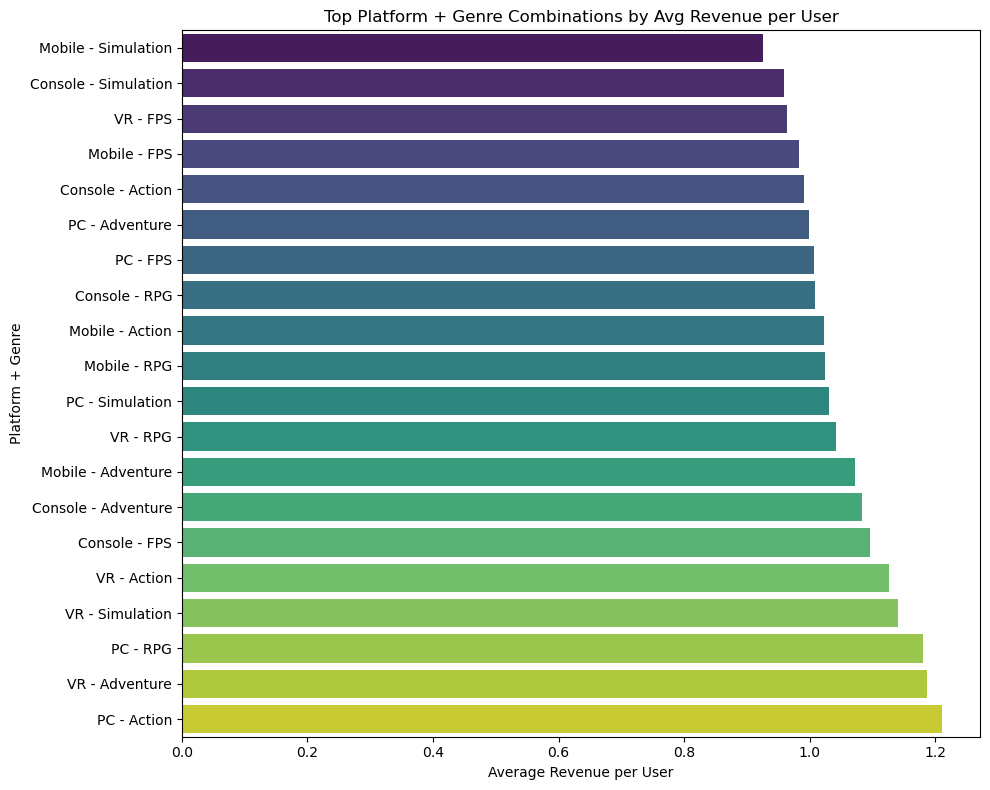

In [42]:
#Using the grouped stats, plot Top Platform with genre combinations by avg revenue per user

# Create a new column to combine platform and genre
grouped_stats['Platform + Genre'] = grouped_stats['platform'] + " - " + grouped_stats['top_genre']

# Sort by mean RPU again just to be safe
plot_data = grouped_stats.sort_values(by='mean', ascending=True).tail(20)  # last 20 for top combos

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=plot_data, x='mean', y='Platform + Genre', palette='viridis', hue='Platform + Genre', legend=False)
plt.title('Top Platform + Genre Combinations by Avg Revenue per User')
plt.xlabel('Average Revenue per User')
plt.ylabel('Platform + Genre')
plt.tight_layout()
plt.show()

#### Interpretation

The plot clearly communicates which Platform + Genre combinations deliver the highest Average Revenue per User (ARPU).

Here’s why this is powerful:

* Marketers can double down on PC Action games.

* Developers may focus on optimizing gameplay for high-RPU segments.

* Designers/Product Managers can prioritize genre mechanics that perform well on high-value platforms.

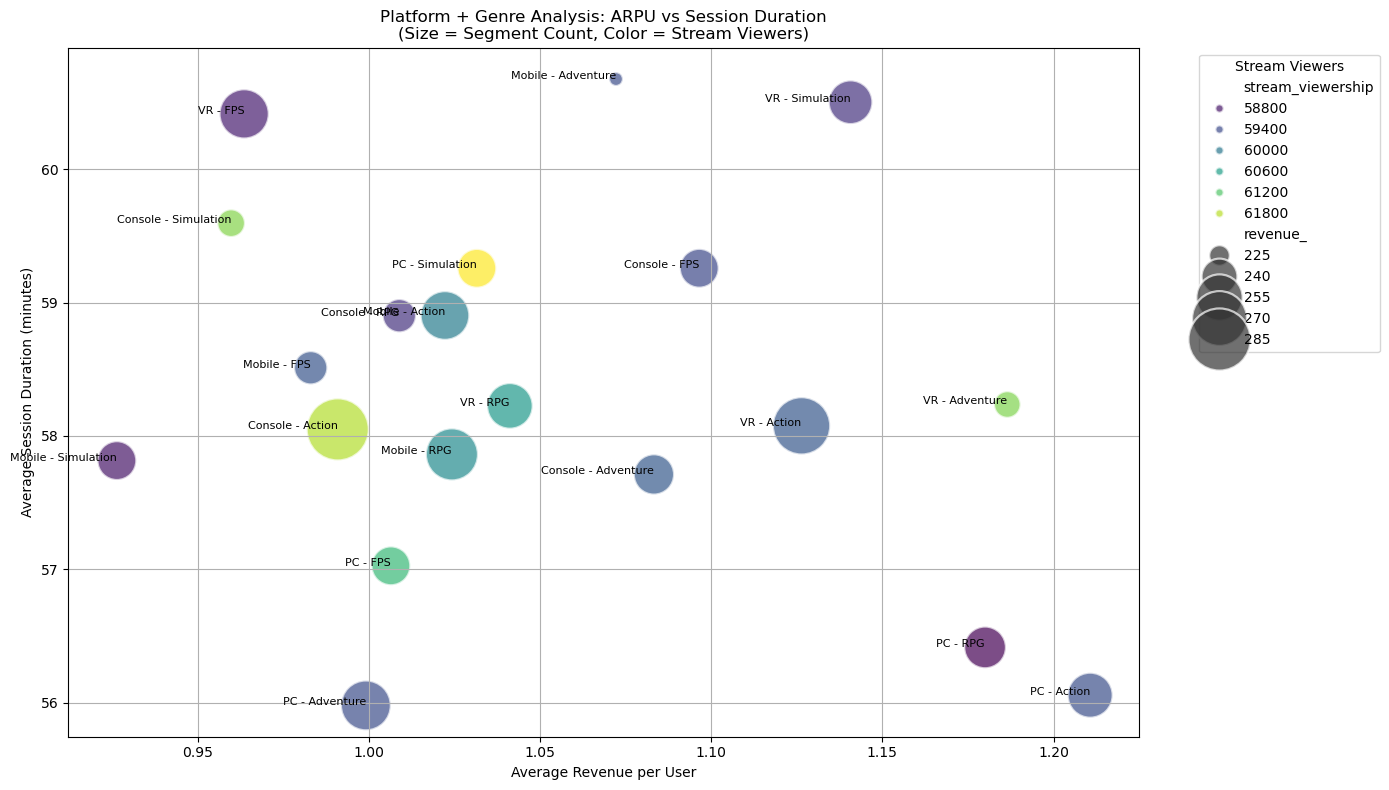

In [69]:
# Group by platform and genre to compute average revenue per user, average session duration,
# total count (frequency), and average stream viewership
grouped_features_by_genre = df.groupby(['platform', 'top_genre']).agg({
    'revenue_per_user': 'mean',
    'session_duration_minutes': 'mean',
    'stream_viewership': 'mean',
    'revenue_': 'count'  # frequency of each segment
}).reset_index()

# Create a composite label
grouped_features_by_genre['Platform_Genre'] = grouped_features_by_genre['platform'] + ' - ' + grouped_features_by_genre['top_genre']

# Bubble plot: X = ARPU, Y = Avg Session Duration, Size = Count, Color = Stream Viewership
plt.figure(figsize=(14, 8))
bubble = sns.scatterplot(
    data=grouped_features_by_genre,
    x='revenue_per_user',
    y='session_duration_minutes',
    size='revenue_',
    hue='stream_viewership',
    palette='viridis',
    sizes=(100, 2000),
    alpha=0.7,
    edgecolor="w",
    legend='brief'
)

# Add labels
for i in range(grouped_features_by_genre.shape[0]):
    plt.text(
        x=grouped_features_by_genre['revenue_per_user'][i],
        y=grouped_features_by_genre['session_duration_minutes'][i],
        s=grouped_features_by_genre['Platform_Genre'][i],
        fontsize=8,
        ha='right'
    )

plt.title('Platform + Genre Analysis: ARPU vs Session Duration\n(Size = Segment Count, Color = Stream Viewers)')
plt.xlabel('Average Revenue per User')
plt.ylabel('Average Session Duration (minutes)')
plt.legend(title='Stream Viewers', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

#### Interpretation

* X-axis	: Average Revenue Per User (ARPU) -> Monetization performance
* Y-axis : Session Duration (minutes) -> Player engagement

* Bubble Size - Segment count / revenue volume -> Popularity or content weight
* Bubble Color - Stream Viewership -> Social/marketing visibility


**Stakeholders Insights:**

* Product Managers : can look for segments with high ARPU + high session time to prioritize features or expansions.

* Game Designers : might notice high session, low ARPU zones and consider improving monetization mechanics.

* Marketers : can spot stream-heavy, low session segments and ask: “Are we over-promoting under-engaging content?”